In [2]:
%matplotlib nbagg
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
names = pd.read_csv('data/us-baby-names/NationalNames.csv', sep=',', 
                     header=0, names=['id', 'name', 'year', 'sex', 'births'])

In [6]:
names.head()

,id,name,year,sex,births
0,1,Mary,1880,F,7065
1,2,Anna,1880,F,2604
2,3,Emma,1880,F,2003
3,4,Elizabeth,1880,F,1939
4,5,Minnie,1880,F,1746


In [7]:
names.shape

(1825433, 5)

In [9]:
total_births = names.pivot_table('births', index='year', columns='sex', aggfunc=sum)

In [11]:
total_births.head()

sex,F,M
year,,
1880,90993,110491
1881,91954,100745
1882,107850,113688
1883,112321,104629
1884,129022,114445


<IPython.core.display.Javascript object>


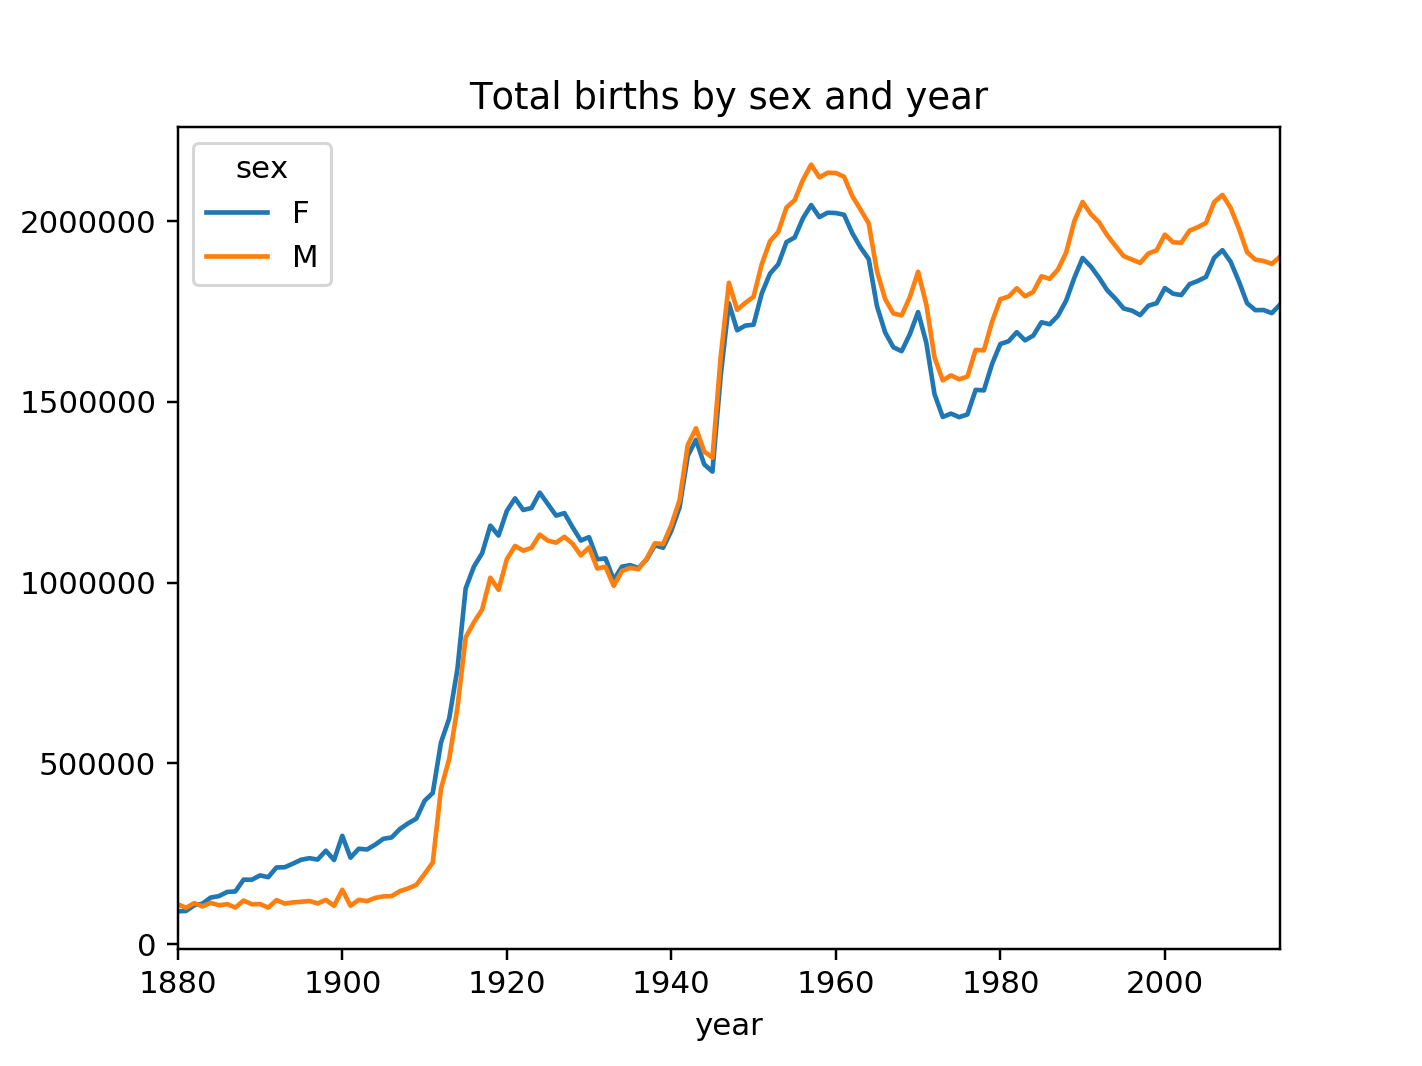

In [13]:
 ax = total_births.plot()

In [14]:
ax.set_title('Total births by sex and year')

Text(0.5,1,'Total births by sex and year')

In [15]:
grouped_names_dict = dict(list(names.groupby(['year', 'sex'])))

In [18]:
grouped_sample = grouped_names_dict[(2011, 'M')]

In [34]:
grouped_sample.head()

,id,name,year,sex,births
1711173,1711174,Jacob,2011,M,20331
1711174,1711175,Mason,2011,M,19488
1711175,1711176,William,2011,M,17314
1711176,1711177,Jayden,2011,M,16954
1711177,1711178,Noah,2011,M,16838


In [31]:
def add_prop(agg_df):
    agg_births = agg_df['births']
    agg_df['prop'] = agg_births / agg_births.sum()
    return agg_df

In [32]:
names_with_group = names.groupby(['year', 'sex']).apply(add_prop)

In [33]:
names_with_group.head()

,id,name,year,sex,births,prop
0,1,Mary,1880,F,7065,1
1,2,Anna,1880,F,2604,1
2,3,Emma,1880,F,2003,1
3,4,Elizabeth,1880,F,1939,1
4,5,Minnie,1880,F,1746,1
